In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
n_points = 100
angs = linspace(0, 2*pi, n_points+1)[:-1]

a = 6
b = 1

In [21]:
fx = lambda a, theta: a*cos(theta)
fy = lambda b, theta: b*sin(theta)

In [22]:
# elipse points
elip_x = fx(a, angs)
elip_y = fy(b, angs)

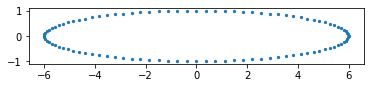

In [25]:
fig = figure()
ax = fig.gca()
ax.set_aspect('equal')
ax.scatter(elip_x, elip_y, s=5)

In [26]:
integ_ds = []
integ_delta_s_val = 0.
dt = 2*pi/n_points
for theta in angs:
    ds_dt = sqrt((a**2*sin(theta)**2)+(b**2*cos(theta)**2))
    
    integ_delta_s_val= integ_delta_s_val+ds_dt*dt
    integ_ds.append(integ_delta_s_val)

for i, theta in enumerate(integ_ds):
    integ_ds[i] = theta/integ_ds[-1]*2.0*pi

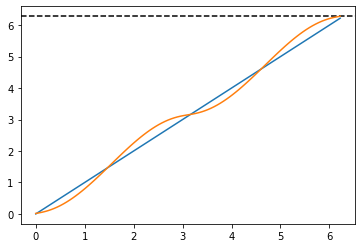

In [27]:
fig = figure()
ax = fig.gca()
ax.axhline(2*pi, c="k", linestyle= "--")
ax.plot(angs, angs)
ax.plot(angs, integ_ds)

In [28]:
elip_xc = []
elip_yc = []
for theta in angs:
    for i in range(n_points-1):
        if theta>= integ_ds[i] and theta<integ_ds[i+1]:
            theta_prime = angs[i]
            elip_xc.append(fx(a, theta_prime))
            elip_yc.append(fy(b, theta_prime))
        elif theta>= integ_ds[i]:
            theta_prime = angs[i]
            elip_xc.append(fx(a, theta_prime))
            elip_yc.append(fy(b, theta_prime))

Text(0.5, 1.0, 'After')

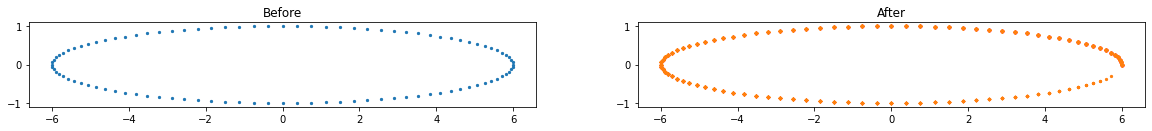

In [29]:
fig = figure(figsize=[20, 5])
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
ax0.set_aspect('equal')
ax1.set_aspect('equal')

ax0.scatter(elip_x, elip_y, c="C0", s=5)
ax1.scatter(elip_xc, elip_yc, c="C1", s=5)

ax0.set_title("Before")
ax1.set_title("After")

In [31]:
elip_x.shape

(100,)

In [33]:
np.shape(elip_xc)

(4935,)